In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import boxcox_normmax,boxcox

In [2]:
# 选择需要清洗的数据，'train' 或 'test' 或 'all'

data_type = 'all'
# 数据读取
if data_type != 'all':
    df_test = pd.read_csv('pfm_{}.csv'.format(data_type))
else:
    df_test = pd.read_csv('pfm_test.csv'.format(data_type))
    df_train = pd.read_csv('pfm_train.csv'.format(data_type))
    df_test = pd.concat([df_test, df_train])

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


In [3]:
# 数据描述
df_test.describe(percentiles=[.05, .25, .5, .75, .95])

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1450.000000,1100.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,...,1450.000000,1450.0,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.00000,1450.000000
mean,36.871724,0.161818,9.177241,2.909655,1026.981379,2.722759,2.731724,2.057931,2.731034,6482.624138,...,2.708276,80.0,0.795172,11.217241,2.801379,2.761379,6.956552,4.220000,2.16000,4.097931
std,9.119033,0.368451,8.085783,1.023925,602.029616,1.090314,0.711068,1.103084,1.103074,4694.115546,...,1.082390,0.0,0.853752,7.738772,1.292009,0.706588,6.053036,3.617954,3.18867,3.546603
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000
5%,24.000000,0.000000,1.000000,1.000000,96.450000,1.000000,1.000000,1.000000,1.000000,2097.900000,...,1.000000,80.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,494.250000,2.000000,2.000000,1.000000,2.000000,2909.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.00000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1023.000000,3.000000,3.000000,2.000000,3.000000,4903.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.00000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1559.500000,4.000000,3.000000,3.000000,4.000000,8339.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.75000,7.000000
95%,54.000000,1.000000,26.000000,4.000000,1967.550000,4.000000,4.000000,4.000000,4.000000,17727.700000,...,4.000000,80.0,3.000000,28.000000,5.000000,4.000000,20.000000,11.000000,9.00000,10.000000
max,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.00000,17.000000


In [4]:
# 数据信息，没有空值
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1099
Data columns (total 31 columns):
Age                         1450 non-null int64
Attrition                   1100 non-null float64
BusinessTravel              1450 non-null object
Department                  1450 non-null object
DistanceFromHome            1450 non-null int64
Education                   1450 non-null int64
EducationField              1450 non-null object
EmployeeNumber              1450 non-null int64
EnvironmentSatisfaction     1450 non-null int64
Gender                      1450 non-null object
JobInvolvement              1450 non-null int64
JobLevel                    1450 non-null int64
JobRole                     1450 non-null object
JobSatisfaction             1450 non-null int64
MaritalStatus               1450 non-null object
MonthlyIncome               1450 non-null int64
NumCompaniesWorked          1450 non-null int64
Over18                      1450 non-null object
OverTime            

D:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


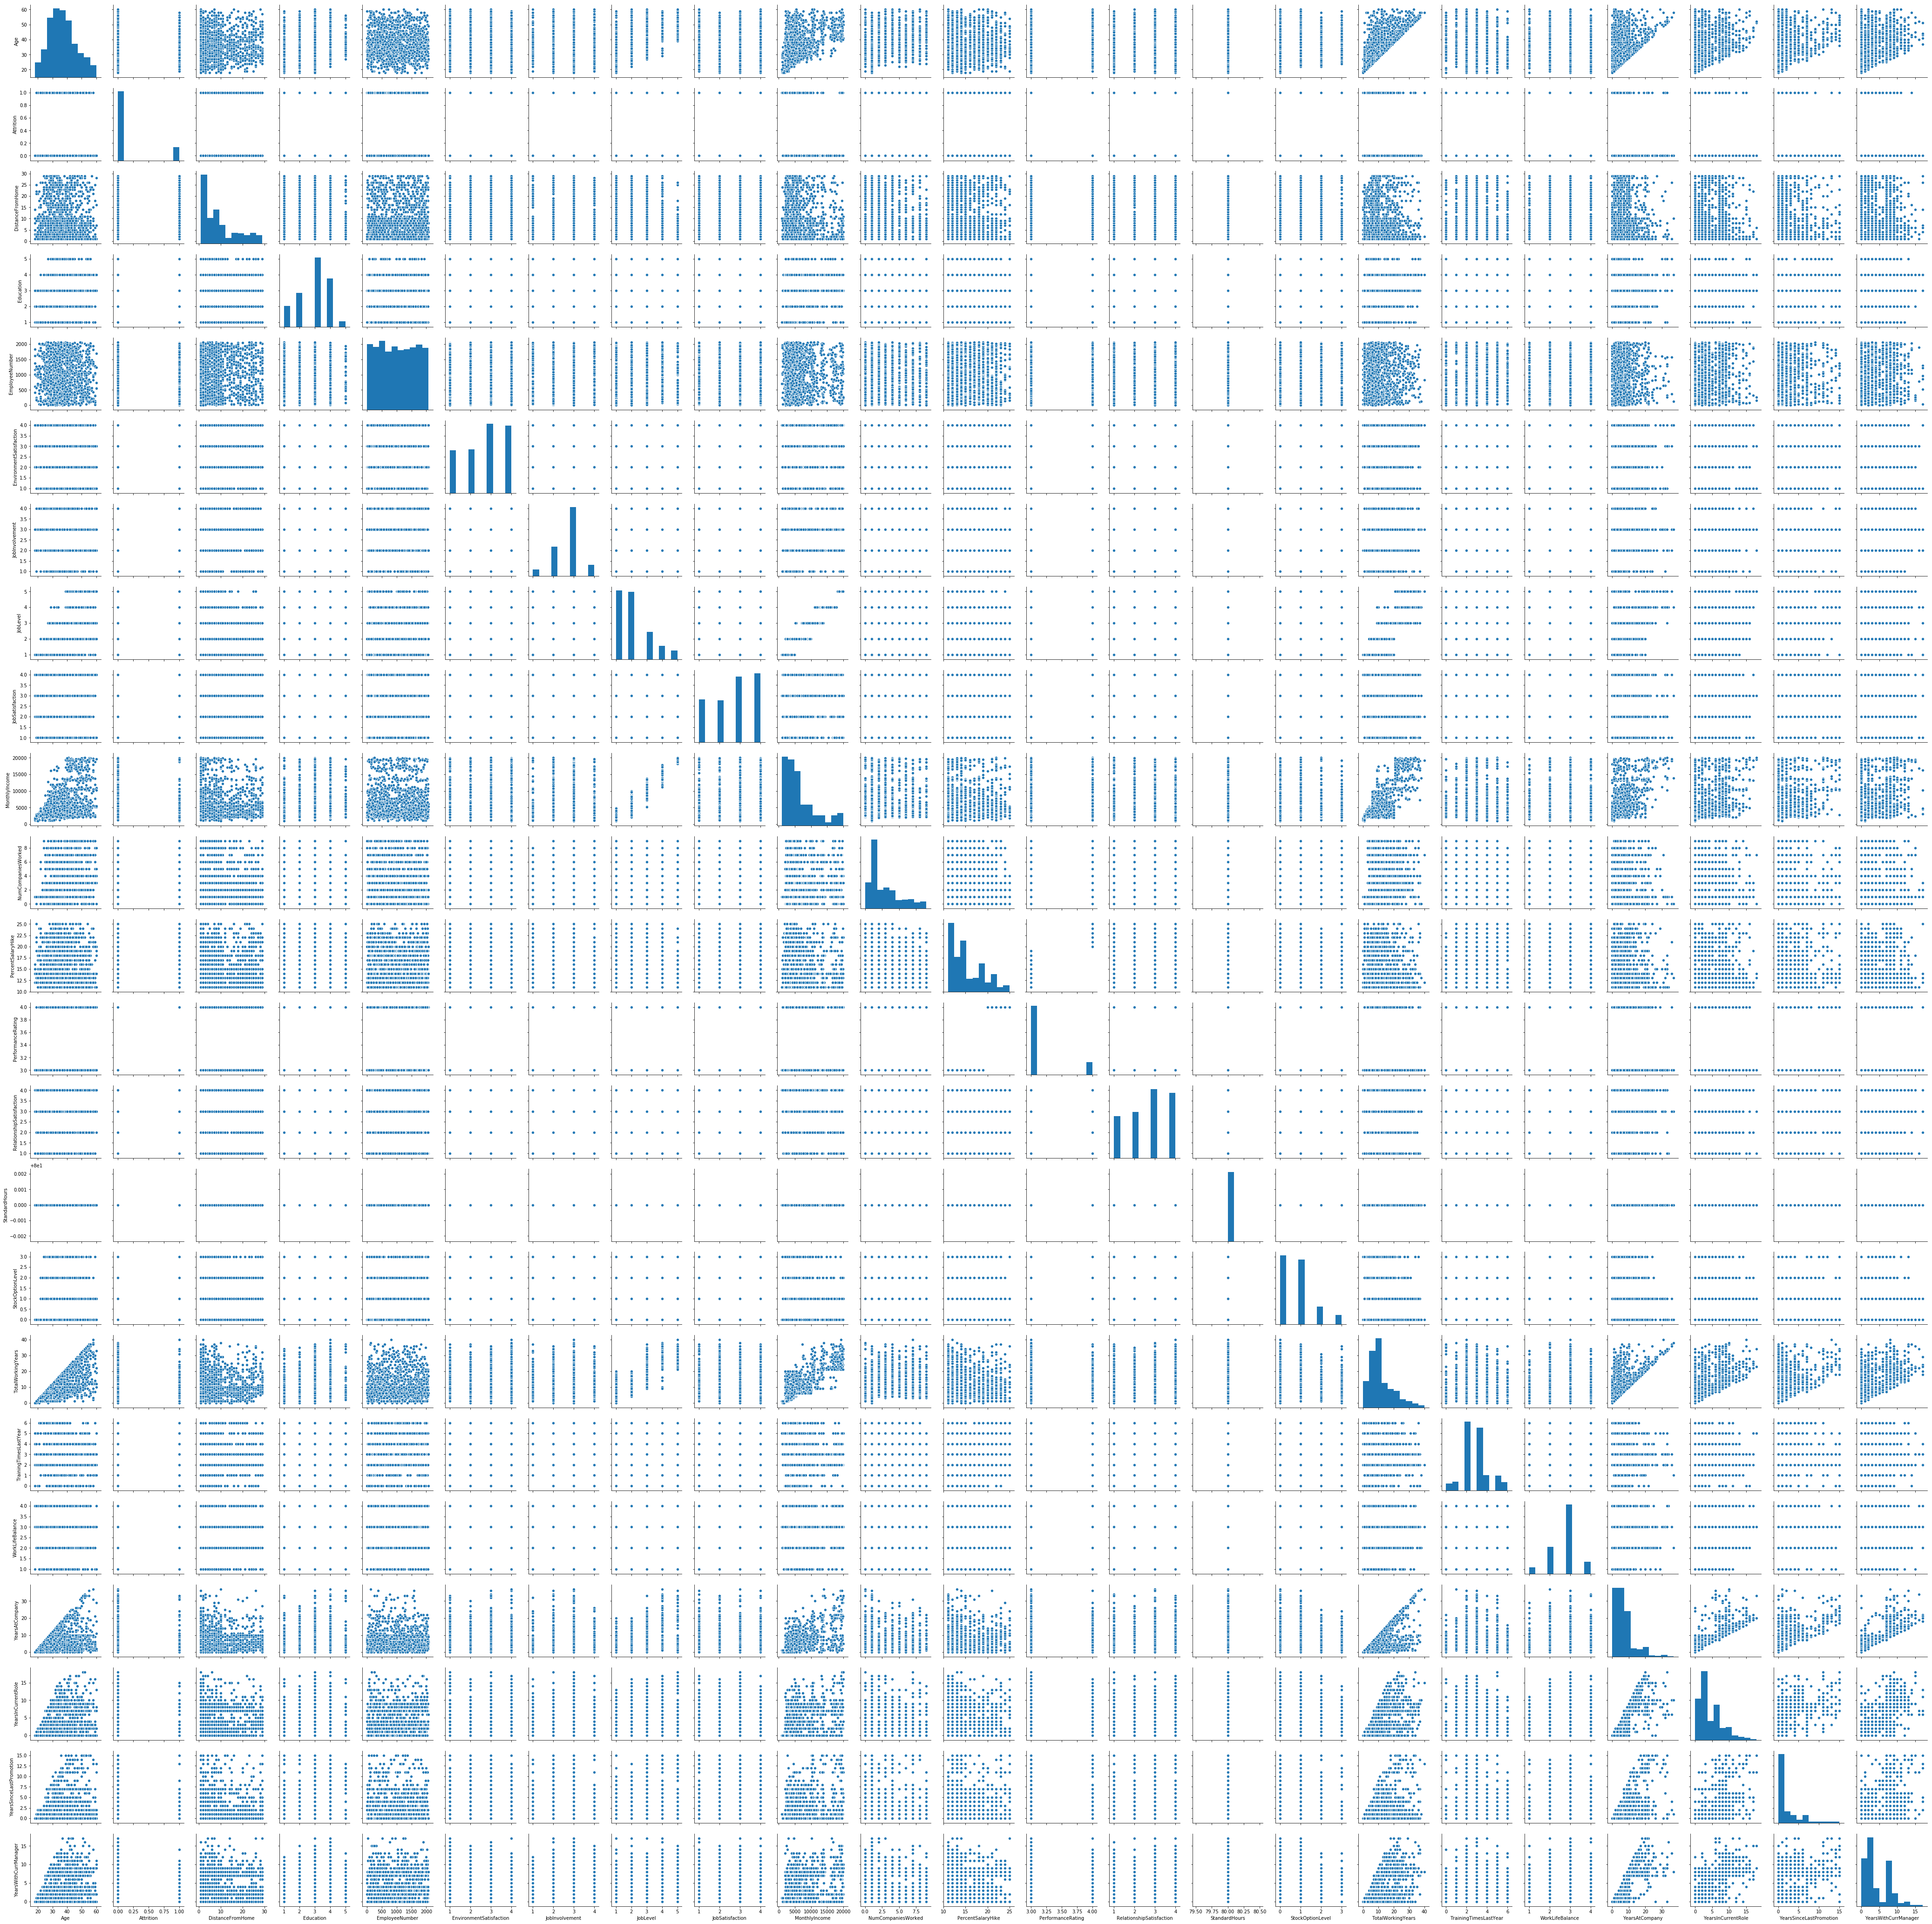

In [5]:
# 打印数据，查找异常值
# 没啥异常
sns.pairplot(df_test, size = 2.5)
plt.show()

In [6]:
# 复制副本，用于清洗
df_copy = df_test.copy()

In [7]:
df_copy.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [19]:
# 针对分类数据进行one-hot编码
columns_one_hot = ['BusinessTravel','Department','EducationField','Gender','JobRole', 'MaritalStatus','OverTime']
df_temp = df_copy.loc[:, columns_one_hot]
df_copy.drop(columns_one_hot, axis=1, inplace=True)
df_temp = pd.get_dummies(df_temp, columns=columns_one_hot, dummy_na=False, drop_first=False)
df_copy = pd.concat([df_copy, df_temp], axis=1)

In [8]:
# 'Over18', 'EmployeeNumber','StandardHours' 数据没有意义，剔除
df_copy.drop(['Over18','EmployeeNumber', 'StandardHours'], axis=1, inplace=True)

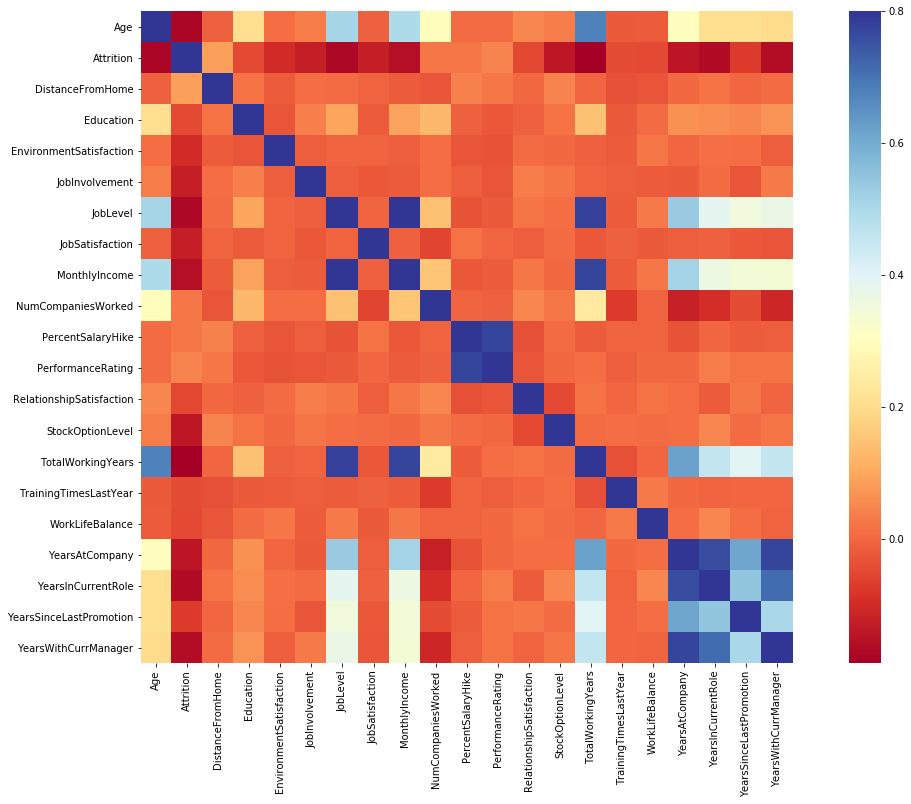

In [9]:
# 数据相关性分析
corrmat = df_copy.corr()
f,ax = plt.subplots(figsize=(20,12))
sns.heatmap(corrmat, vmax=0.8, square=True, cmap='RdYlBu')

In [10]:
high_cor_cols = []
for col in corrmat.columns:
    second_largest_cor = corrmat[col].nlargest(3).reset_index()[col][1]
    if second_largest_cor > 0.7:
        high_cor_cols.append(col)
corrmat.loc[high_cor_cols, high_cor_cols]

,JobLevel,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
JobLevel,1.000000,0.950108,-0.031905,-0.020725,0.784254,0.535986,0.390557,0.374291
MonthlyIncome,0.950108,1.000000,-0.025245,-0.016850,0.773502,0.514967,0.364340,0.341829
PercentSalaryHike,-0.031905,-0.025245,1.000000,0.773407,-0.015984,-0.033342,-0.000020,-0.012690
PerformanceRating,-0.020725,-0.016850,0.773407,1.000000,0.009210,0.003385,0.033620,0.018334
TotalWorkingYears,0.784254,0.773502,-0.015984,0.009210,1.000000,0.621500,0.458609,0.458619
YearsAtCompany,0.535986,0.514967,-0.033342,0.003385,0.621500,1.000000,0.761801,0.774918
YearsInCurrentRole,0.390557,0.364340,-0.000020,0.033620,0.458609,0.761801,1.000000,0.714942
YearsWithCurrManager,0.374291,0.341829,-0.012690,0.018334,0.458619,0.774918,0.714942,1.000000


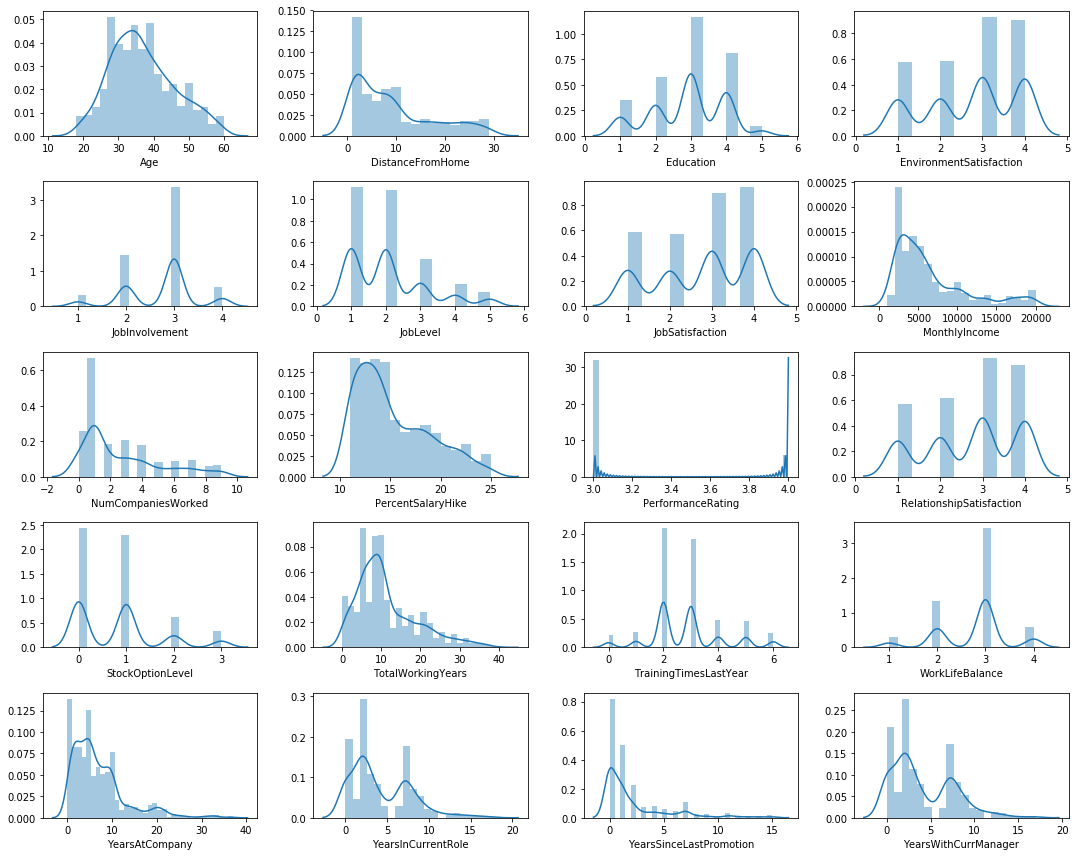

In [11]:
# 数据偏度处理
import math
columns_normal = ['Age', 'DistanceFromHome', 'Education', \
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',\
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',\
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',\
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',\
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',\
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
total_len = len(columns_normal)
width = 4
height = math.ceil(total_len/width)
fig = plt.figure(figsize=(height*3,12))
for i,col in enumerate(columns_normal):
    plt.subplot(height, width, i+1)
    sns.distplot(df_copy[col])
fig.tight_layout()
plt.show()

In [12]:
# 偏度大于1的数据进行纠偏
columns_skewed = []
for i,col in enumerate(columns_normal):
    print(col, "- 偏度: ", df_copy[col].skew(), ' - 峰度：',  df_copy[col].kurt())
    if abs(df_copy[col].skew()) > 1:
        columns_skewed.append(col)

print('cols skewed: \n', columns_skewed)
for col in columns_skewed:
    print(col)
    df_copy[col] = boxcox(df_copy[col] - df_copy[col].min() + 0.1)[0]

Age - 偏度:  0.4223980035017664  - 峰度： -0.3970718617466926
DistanceFromHome - 偏度:  0.959775489814808  - 峰度： -0.2137577746695194
Education - 偏度:  -0.29367501749705993  - 峰度： -0.5653046026880126
EnvironmentSatisfaction - 偏度:  -0.3233304745853658  - 峰度： -1.1945309645541955
JobInvolvement - 偏度:  -0.5062163164343971  - 峰度： 0.28596463228635915
JobLevel - 偏度:  1.0314571723470913  - 峰度： 0.4238059399471248
JobSatisfaction - 偏度:  -0.33115048917477846  - 峰度： -1.2223145412188807
MonthlyIncome - 偏度:  1.380283316862855  - 峰度： 1.0454826989003196
NumCompaniesWorked - 偏度:  1.0317856969575916  - 峰度： 0.02752180403587312
PercentSalaryHike - 偏度:  0.8142850942221312  - 峰度： -0.315616898285231
PerformanceRating - 偏度:  1.9140272179634046  - 峰度： 1.6657959390511703
RelationshipSatisfaction - 偏度:  -0.29718186693121446  - 峰度： -1.1909672275783838
StockOptionLevel - 偏度:  0.9644578077669731  - 峰度： 0.3435661038875759
TotalWorkingYears - 偏度:  1.1196617925428234  - 峰度： 0.9124190466079849
TrainingTimesLastYear - 偏度:  0.548

## 可以看到以下特征相关性最强，这里先标注起来，暂不剔除
- 职业级别  月收入
- 月收入  总工龄
- 工资提高百分比  绩效评估
- 公司工作年数  目前工作职责工作年数  跟目前管理者共事年数
- 员工所在部门为人力资源部 工作角色为人力资源
- 员工所在部门为销售部  工作角色为销售主管

In [13]:
# 数据归一化
columns_normal = ['Age', 'DistanceFromHome', 'Education', \
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',\
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',\
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',\
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',\
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',\
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in columns_normal:
    df_copy[col] = StandardScaler().fit_transform(np.array(df_copy[col]).reshape(-1,1))

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted

In [14]:
if data_type != 'all':
    df_copy_test = df_copy.loc[df_copy['Attrition'].isna()]
    df_copy_train = df_copy.loc[df_copy['Attrition'].notna()]
    df_copy_test.to_csv('test_after_preprocess.csv'.format(data_type), index=False)
    df_copy_train.to_csv('train_after_preprocess.csv'.format(data_type), index=False)
else:
    df_copy.to_csv('{}_after_preprocess.csv'.format(data_type), index=False)